# Warsztaty modelowania w nanofizyce
----
## Ruchy atomów jako funkcja temperatury

**Paweł T. Jochym**

Zakład Komputerowych Badań Materiałów

Instytut Fizyki Jądrowej PAN, Kraków

----
Jak uczy kinetyczna teoria materii temperatura jest jedynie przejawem chaotycznych 
ruchów atomów. Przekonajmy się jak ruchy te zależą od temperatury w której znajduje 
się układ, i czy ta zależność mówi nam coś o zjawiskach w nim zachodzących. Posłużymy się
w tym celu wynikami obliczeń kwantowo-mechanicznych przeprowadzonych na nanocząstce Fe-Pt 
w różnych temperaturach z zakresu 150K-2000K.

Musimy naturalnie zacząć od wczytania trajektorii z pliku danych.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl
from ase import Atoms
from ase import units as un
import ase.io
from IPython.core.display import Image
import numpy as np
from numpy import array, sum, std, mean, sqrt
from glob import glob
from ase.io.trajectory import Trajectory

In [2]:
def recenter(a):
    '''
    Normalizacja położenia nanocząstki do stałej pozycji środka masy.
    Przemieszczenie centrum masy do środka komórki.
    Uwaga: do działania konieczna jest istotna próżnia wokoło struktury.
    '''
    # Kopia struktury a
    c=Atoms(numbers=a.get_atomic_numbers(),
            positions=a.get_positions(),
            cell=a.get_cell(),
            pbc=a.get_pbc())
    
    c.translate((c.get_cell()/2).sum(axis=0)-c.get_center_of_mass())
    c.set_scaled_positions(c.get_scaled_positions())
    c.translate((c.get_cell()/2).sum(axis=0)-c.get_center_of_mass())
    c.set_scaled_positions(c.get_scaled_positions())
    return c

In [3]:
md={}
print('Czytanie trajektorii', end=' ')

for fn in glob('data/md_T_*.traj'):
    # Użyj części nazwy pliku jako identyfikacji temperatury
    T=int(fn.split('/')[-1][5:-5])
    # Wczytaj trajektorię z pliku
    print('.', end='')
    md[T]=[recenter(a) for a in Trajectory(fn)]

print()
print(sorted(md.keys()))

Czytanie trajektorii .....................
[150, 300, 500, 600, 700, 800, 850, 900, 950, 1000, 1100, 1200, 1300, 1350, 1400, 1425, 1450, 1500, 1600, 1700, 2000]


In [6]:
# Miejsce na średnie wychylenie kwadratowe (MSD)
msd=[]
print('T: ', end='')
for T in sorted(md.keys()):
    print(T, end=' ')
    # Lista atomów ma stały porządek w trajektorii
    Fe=array(md[T][0].get_chemical_symbols())=='Fe'
    Pt=array(md[T][0].get_chemical_symbols())=='Pt'
    
    # Trajektorie atomów Fe i Pt osobno
    trjFe=array([a.get_positions()[Fe] for a in md[T]])
    trjPt=array([a.get_positions()[Pt] for a in md[T]])
    
    # Normalizacja trajektorii względem średniego położenia atomu
    trjFe=(trjFe-mean(trjFe,axis=0))
    trjPt=(trjPt-mean(trjPt,axis=0))

    # Średnie wychylenie kwadratowe atomu
    msd.append([T,
                   mean((sum(trjFe**2,axis=-1)).reshape(-1),axis=0),
                   mean((sum(trjPt**2,axis=-1)).reshape(-1),axis=0)])

# Przekształcenie w macierz dla wygody indeksowania
msd=array(msd).T
print()

T: 150 300 500 600 700 800 850 900 950 1000 1100 1200 1300 1350 1400 1425 1450 1500 1600 1700 2000 


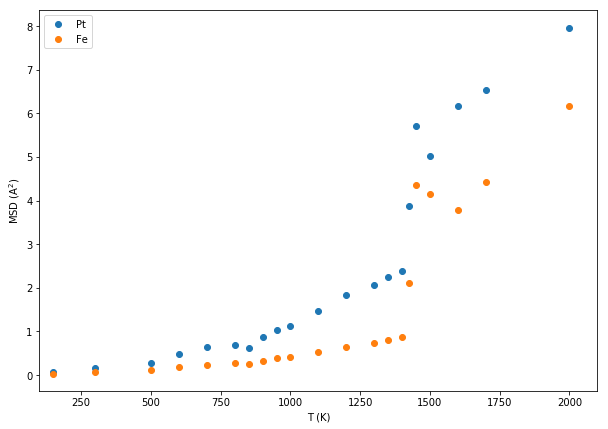

In [7]:
# Narysujmy wyniki
plt.figure(figsize=(10,7))
plt.plot(msd[0],msd[2],'o',label='Pt')
plt.plot(msd[0],msd[1],'o',label='Fe')
plt.xlabel('T (K)')
plt.ylabel('MSD (A$^2$)')
plt.xlim(100,2100)
plt.legend(loc='best');